In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load cleaned data
df = pd.read_csv('/content/drive/MyDrive/MISC/resume_cleaned.csv')



*   Converts resume text into numeric features using TF-IDF

* Splits into training/testing sets


* Trains a Logistic Regression model

* Evaluates performance using classification metrics & confusion matrix


In [ ]:
# 03_model_training.ipynb
# Features and labels
X = df['Cleaned_Resume']
y = df['Category']

# Vectorize text using TF-IDF
tfidf = TfidfVectorizer(max_features=3000)
X_tfidf = tfidf.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7879014189693802

Classification Report:
                            precision    recall  f1-score   support

               Accountant       0.81      0.94      0.87        70
                 Advocate       0.69      0.83      0.75        58
              Agriculture       0.93      0.88      0.90        59
                  Apparel       0.75      0.92      0.83        64
             Architecture       0.88      0.62      0.73        69
                     Arts       0.79      0.70      0.74        66
               Automobile       0.64      0.57      0.61        63
                 Aviation       0.83      0.91      0.87        68
                      BPO       0.72      0.33      0.45        40
                  Banking       0.87      0.94      0.90        63
               Blockchain       1.00      0.44      0.62         9
Building and Construction       0.81      0.90      0.85        69
         Business Analyst       0.77      0.82      0.79        68
       

# ***04_model_visualization***

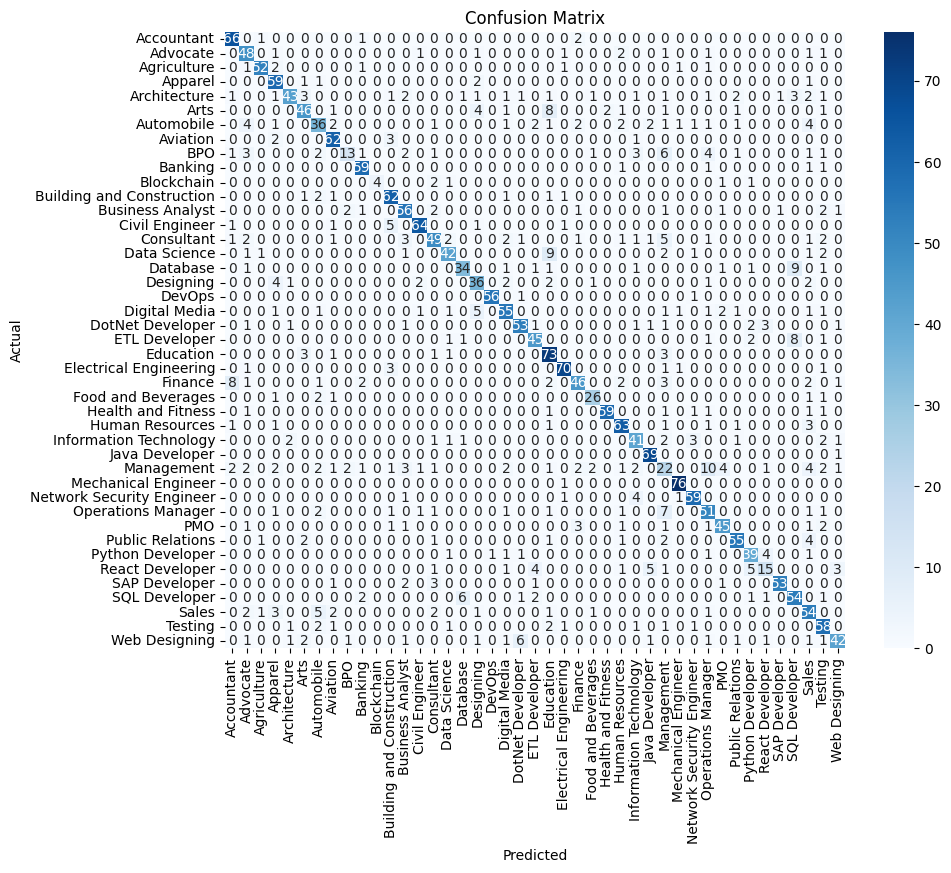

In [ ]:

# Confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#Step 2: F1 Score Per Class (Bar Chart)

/tmp/ipython-input-10-3232330737.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_sorted.index, x=df_sorted['f1-score'], palette='viridis')


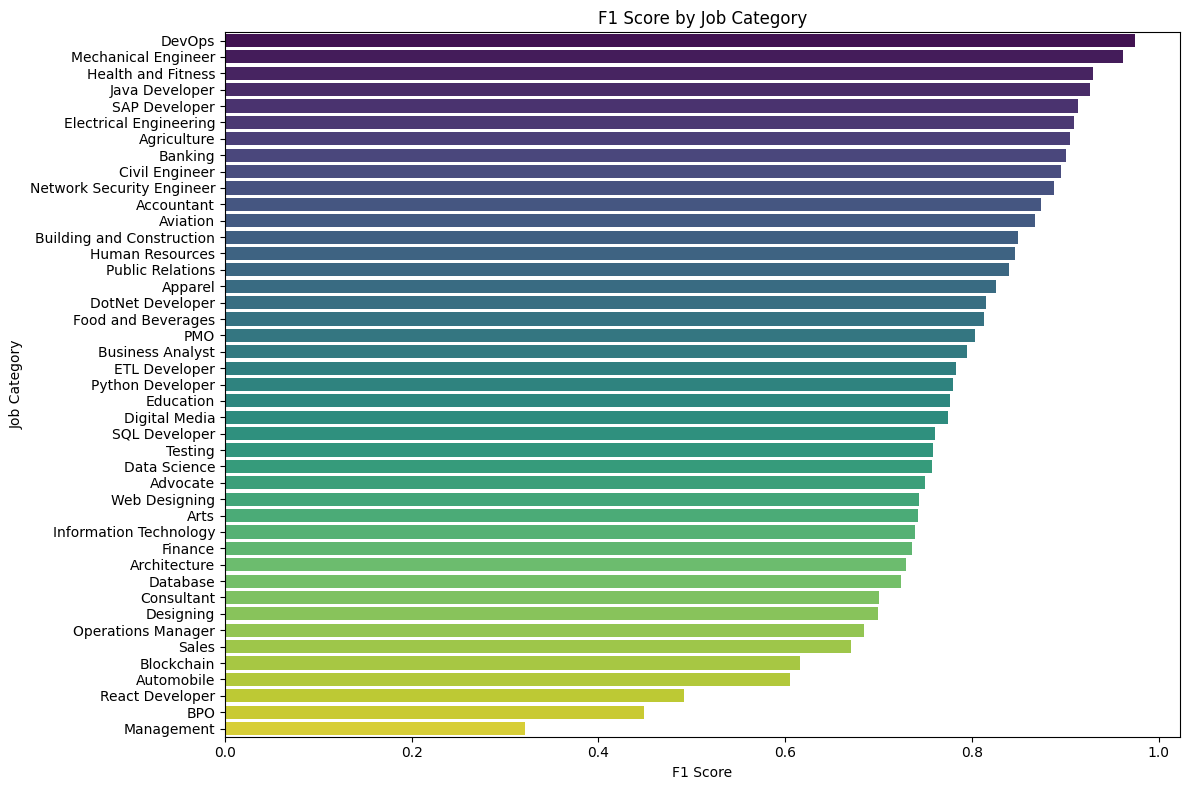

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

df_report = df_report.iloc[:-3]  # Drop avg/total rows

# Sort by F1-score
df_sorted = df_report.sort_values("f1-score", ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(y=df_sorted.index, x=df_sorted['f1-score'], palette='viridis')
plt.title("F1 Score by Job Category")
plt.xlabel("F1 Score")
plt.ylabel("Job Category")
plt.tight_layout()
plt.show()


#Step 3: Support Distribution

/tmp/ipython-input-11-1551573579.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_sorted.index, x=df_sorted['support'], palette='coolwarm')


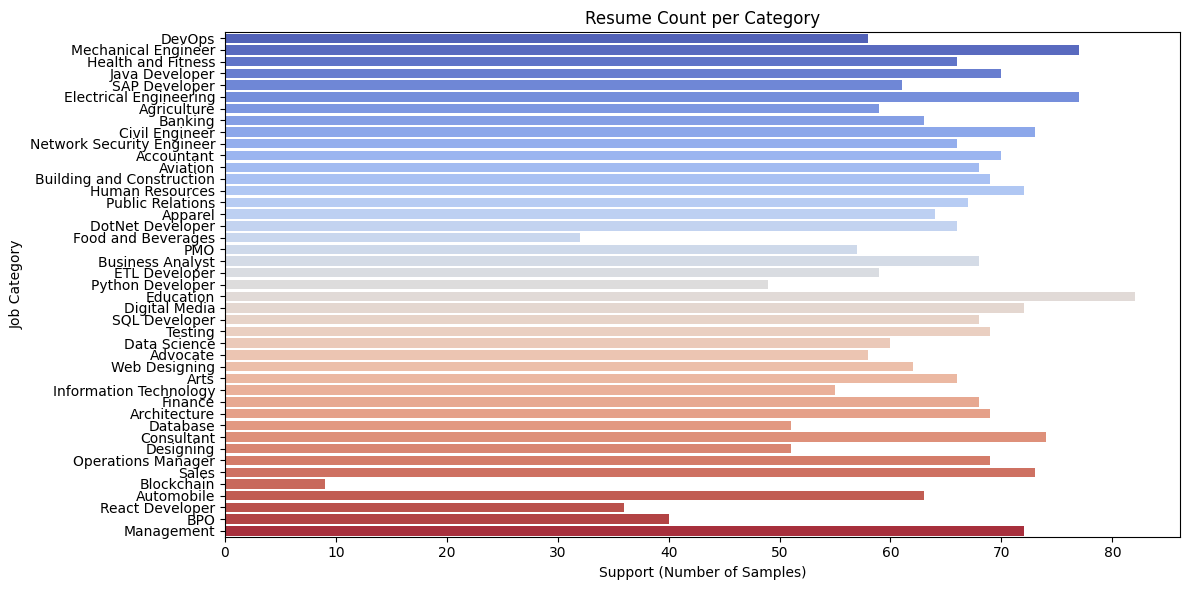

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(y=df_sorted.index, x=df_sorted['support'], palette='coolwarm')
plt.title("Resume Count per Category")
plt.xlabel("Support (Number of Samples)")
plt.ylabel("Job Category")
plt.tight_layout()
plt.show()
